In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm


In [2]:
df = pd.read_csv('data/2022.csv', delimiter=';')
df.head()

,Date Time,NOx,NO2,NO,SiteID,PM10,NVPM10,VPM10,NVPM2.5,PM2.5,...,SO2,Temperature,RH,Air Pressure,Location,geo_point_2d,DateStart,DateEnd,Current,Instrument Type
0,2022-03-20T07:00:00+00:00,16.5654,13.9982,1.6743,452,13.527,NaN,NaN,NaN,12.0,...,NaN,3.7,NaN,NaN,AURN St Pauls,"51.46282941748531,-2.584540816301439",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
1,2022-03-20T12:00:00+00:00,10.7755,8.7000,1.3537,452,15.459,NaN,NaN,NaN,9.0,...,NaN,9.5,NaN,NaN,AURN St Pauls,"51.46282941748531,-2.584540816301439",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
2,2022-03-20T15:00:00+00:00,12.7055,10.9030,1.1756,452,23.189,NaN,NaN,NaN,8.0,...,NaN,9.8,NaN,NaN,AURN St Pauls,"51.46282941748531,-2.584540816301439",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
3,2022-03-20T21:00:00+00:00,47.3373,46.4088,0.6056,452,39.614,NaN,NaN,NaN,19.0,...,NaN,3.4,NaN,NaN,AURN St Pauls,"51.46282941748531,-2.584540816301439",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
4,2022-03-21T05:00:00+00:00,38.4043,37.9126,0.3207,452,33.817,NaN,NaN,NaN,29.0,...,NaN,1.7,NaN,NaN,AURN St Pauls,"51.46282941748531,-2.584540816301439",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)


In [3]:
df.shape

(39503, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39503 entries, 0 to 39502
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Time        39503 non-null  object 
 1   NOx              38790 non-null  float64
 2   NO2              38779 non-null  float64
 3   NO               38779 non-null  float64
 4   SiteID           39503 non-null  int64  
 5   PM10             9190 non-null   float64
 6   NVPM10           0 non-null      float64
 7   VPM10            0 non-null      float64
 8   NVPM2.5          0 non-null      float64
 9   PM2.5            8088 non-null   float64
 10  VPM2.5           0 non-null      float64
 11  CO               0 non-null      float64
 12  O3               4684 non-null   float64
 13  SO2              0 non-null      float64
 14  Temperature      10095 non-null  float64
 15  RH               1503 non-null   float64
 16  Air Pressure     0 non-null      float64
 17  Location    

In [5]:
df.describe()

,NOx,NO2,NO,SiteID,PM10,NVPM10,VPM10,NVPM2.5,PM2.5,VPM2.5,CO,O3,SO2,Temperature,RH,Air Pressure,DateEnd
count,38790.000000,38779.000000,38779.000000,39503.000000,9190.000000,0.0,0.0,0.0,8088.000000,0.0,0.0,4684.000000,0.0,10095.000000,1503.000000,0.0,0.0
mean,65.209339,29.686458,23.160823,409.336000,20.747153,NaN,NaN,NaN,13.454331,NaN,NaN,53.602040,NaN,7.732435,19.585123,NaN,NaN
std,82.936864,23.882318,41.490966,153.984025,13.160829,NaN,NaN,NaN,55.331859,NaN,NaN,25.314616,NaN,4.717842,12.509994,NaN,NaN
min,0.191000,-2.170200,-1.208600,203.000000,-3.768000,NaN,NaN,NaN,-6.000000,NaN,NaN,-0.349200,NaN,-3.600000,0.000000,NaN,NaN
25%,19.299350,13.250000,3.001150,215.000000,12.561000,NaN,NaN,NaN,5.000000,NaN,NaN,40.313000,NaN,4.170900,0.013000,NaN,NaN
50%,39.541150,23.558800,9.750000,452.000000,18.358000,NaN,NaN,NaN,8.000000,NaN,NaN,57.725600,NaN,7.600000,24.793600,NaN,NaN
75%,75.000000,38.750000,24.000000,500.000000,26.087000,NaN,NaN,NaN,13.000000,NaN,NaN,70.747600,NaN,10.500000,29.000000,NaN,NaN
max,1266.750000,238.500000,679.250000,672.000000,531.700000,NaN,NaN,NaN,995.000005,NaN,NaN,147.283000,NaN,25.700000,36.000000,NaN,NaN


In [6]:
df["Date Time"] = pd.to_datetime(df["Date Time"])

In [7]:
df['SiteID'].value_counts()

SiteID
452    4966
500    4939
215    4939
463    4938
203    4938
501    4937
270    4937
672    4909
Name: count, dtype: int64

In [8]:
site452_df = df[df['SiteID'] == 452]
site452_df = site452_df[['Date Time', "NO2"]]
site452_df = site452_df.set_index('Date Time')
site452_df = site452_df.sort_index()
site452_df = site452_df['NO2']
site452_df = site452_df.resample('H').mean()
site452_df = site452_df.fillna(method='ffill')


C:\Users\jaydn\AppData\Local\Temp\ipykernel_11456\1220668743.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  site452_df = site452_df.resample('H').mean()
C:\Users\jaydn\AppData\Local\Temp\ipykernel_11456\1220668743.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  site452_df = site452_df.fillna(method='ffill')


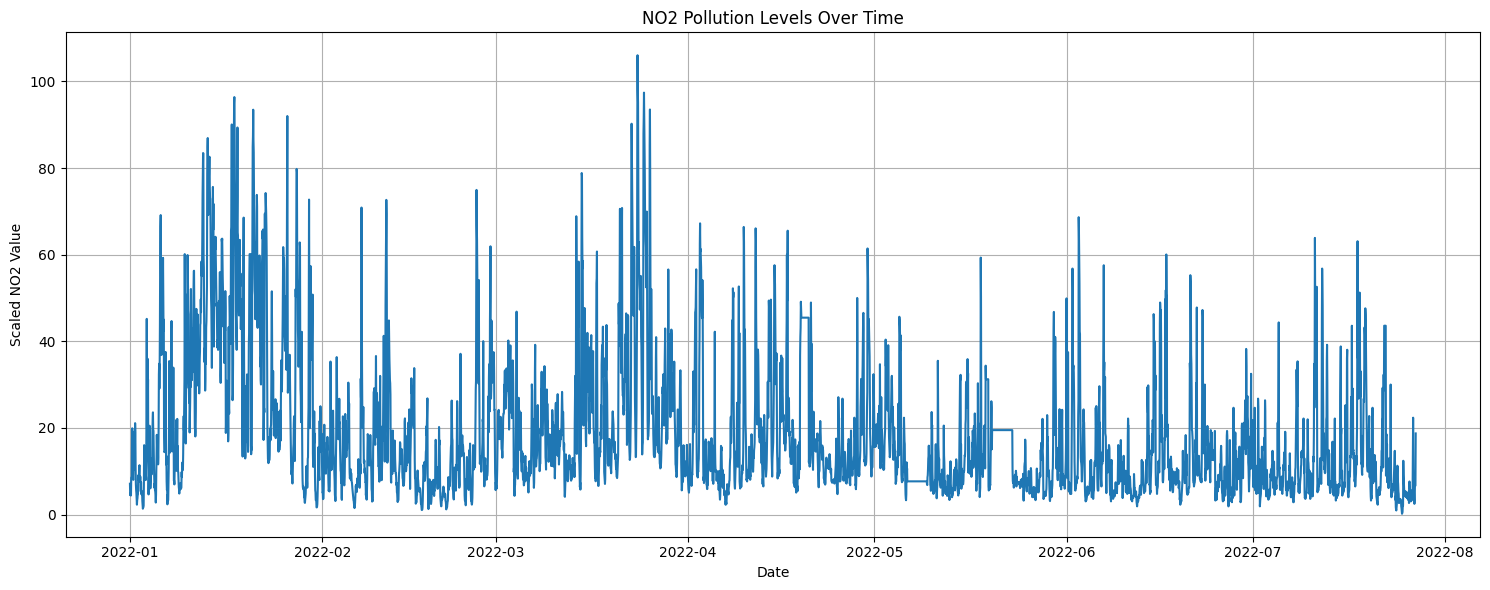

In [9]:
df = df.sort_values('Date Time')

plt.figure(figsize=(15, 6))
plt.plot(site452_df)
plt.title('NO2 Pollution Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled NO2 Value')
plt.grid(True)
plt.tight_layout()

In [10]:
result = adfuller(site452_df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.398749
p-value: 0.000000


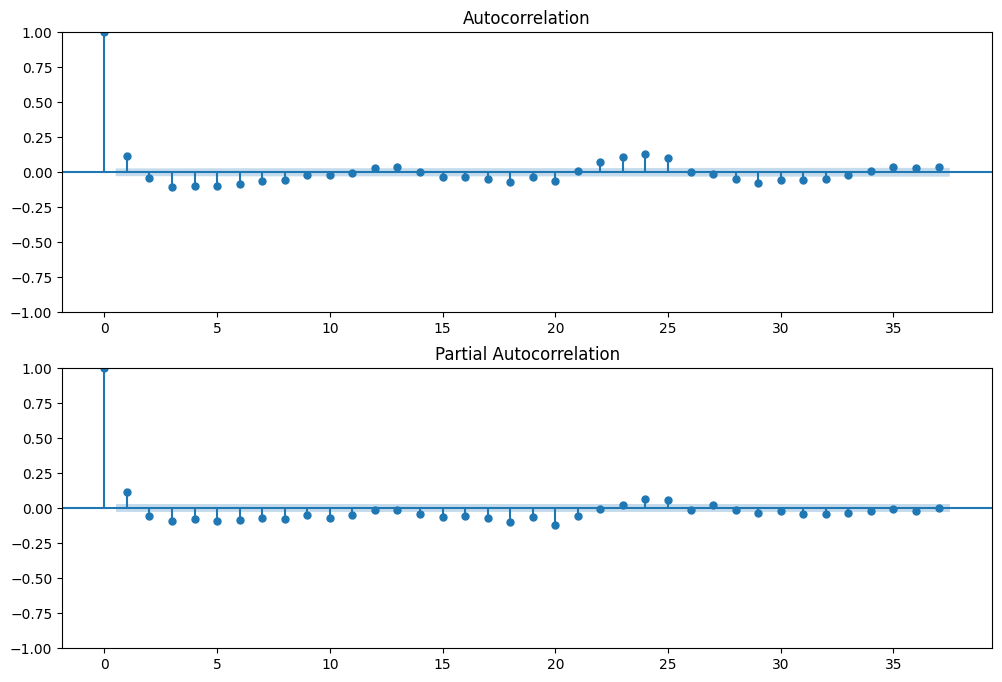

In [11]:
data_diff = site452_df.diff().dropna()



# Create the plots for the differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_diff, ax=ax1)
plot_pacf(data_diff, ax=ax2)
plt.show()

In [12]:

# Define the ARIMA model with your chosen parameters
model = pm.auto_arima(
    site452_df,
    start_p=1, start_q=1,
    test='adf', # Use ADF test to find optimal 'd'
    max_p=2, max_q=2,
    m=24, # Assuming an hourly cycle (24 hours per day)
    start_P=0, seasonal=True,
    d=None, D=1, trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Fit the model to the data
model_fit = model.fit()

# Print the model summary
# print(model_fit.summary())

fitted_values = model_fit.predict(start=1, end=len(site452_df) - 1)

# Generate a forecast for the next 30 steps (e.g., 30 hours)
forecast_result = model_fit.get_forecast(steps=500)
forecast_values = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int() # Get the 95% confidence interval

# Step 6: Plot the results
plt.figure(figsize=(15, 6))

# Plot the original data
plt.plot(site452_df, label='Original Data')

# Plot the in-sample fitted values
plt.plot(fitted_values, color='red', label='Fitted Values')

# Plot the out-of-sample forecast
plt.plot(forecast_values, color='green', linestyle='--', label='Forecast')

# Plot the confidence interval as a shaded area
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2, label='Confidence Interval')

plt.title('ARIMA Model Fit and Forecast for NO2')
plt.xlabel('Date')
plt.ylabel('NO2 Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Performing stepwise search to minimize aic


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Ana

 ARIMA(1,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=15.99 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=41705.472, Time=0.31 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=33791.698, Time=8.74 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=35995.227, Time=9.25 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=41703.480, Time=0.19 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=35186.783, Time=1.11 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=33339.623, Time=42.44 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=53.93 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=20.84 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=40367.029, Time=24.29 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=33288.281, Time=44.16 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=33749.200, Time=10.32 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=80.55 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=22.08 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,1,0)[24] intercept   : AIC=33289.220, Time=69.95 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,0)[24] intercept   : AIC=33287.230, Time=47.65 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,0)[24] intercept   : AIC=33749.387, Time=11.10 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,1)[24] intercept   : AIC=inf, Time=60.45 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,1)[24] intercept   : AIC=inf, Time=20.40 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,0)[24] intercept   : AIC=36514.272, Time=48.35 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,1,0)[24] intercept   : AIC=33289.214, Time=56.43 sec


c:\Users\jaydn\Documents\Projects\Polution-ARIMA-Analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


MemoryError: Unable to allocate 197. MiB for an array with shape (72, 72, 4976) and data type float64